In [9]:
import os

import pandas as pd

In [10]:
NATURE_PATH = "data/compare/plddt/Nature"
P450DIFFUSION_PATH = "data/compare/plddt/P450Diffusion"
P450DIFF2_PATH = "data/compare/plddt/P450Diff2"

In [11]:
def read_all_plddt(path):
    all_dfs = []

    # 遍历目录下的所有子目"录
    for root, dirs, files in os.walk(path):
        if "results.txt" in files:
            file_path = os.path.join(root, "results.txt")
            try:
                df = pd.read_csv(file_path, sep="\t")  # 根据实际分隔符修改
                df["source_folder"] = os.path.basename(root)  # 添加来源文件夹信息
                all_dfs.append(df)
            except Exception as e:
                print(f"读取 {file_path} 时出错: {e}")

    if all_dfs:
        return pd.concat(all_dfs, ignore_index=True)
    else:
        print("未找到任何 results.txt 文件")
        return pd.DataFrame()

In [12]:
dfNature = read_all_plddt(NATURE_PATH)
dfP450Diffusion = read_all_plddt(P450DIFFUSION_PATH)
dfP450Diff2 = read_all_plddt(P450DIFF2_PATH)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [14]:
dfNature["source"] = "Nature"
dfP450Diffusion["source"] = "P450Diffusion"
dfP450Diff2["source"] = "P450Diff2"

# 合并所有 DataFrame
df_all = pd.concat([dfNature, dfP450Diffusion, dfP450Diff2], ignore_index=True)
df_all.rename(columns=lambda x: x.replace(" ", ""), inplace=True)

In [15]:
print(df_all.columns.tolist())

['SequenceID', 'pLDDT', 'source_folder', 'source']


/tmp/ipykernel_493087/2250161169.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="source", y="pLDDT", data=df_all, palette="Set2", showfliers=False)


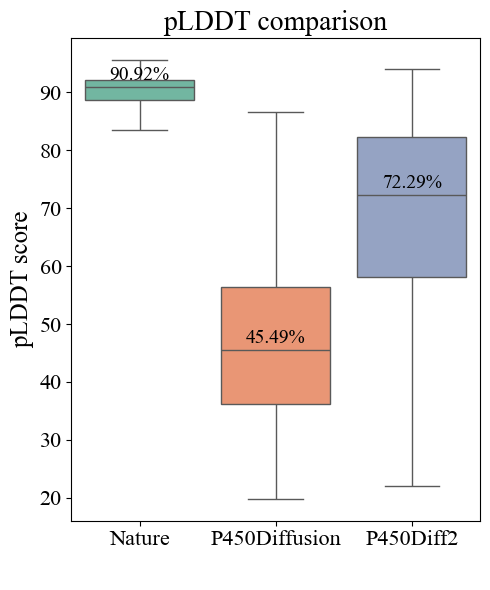

In [16]:
# 画箱线图
plt.figure(figsize=(5, 6))
FONT_PATH = "data/font/Times New Roman.ttf"
font_prop = font_manager.FontProperties(fname=FONT_PATH)

ax = sns.boxplot(x="source", y="pLDDT", data=df_all, palette="Set2", showfliers=False)
# 获取实际的 x 轴标签顺序
xtick_labels = [t.get_text() for t in ax.get_xticklabels()]

# 根据绘图顺序来标中位数
for i, label in enumerate(xtick_labels):
    median_val = df_all[df_all["source"] == label]["pLDDT"].median()
    ax.text(
        i,
        median_val + 0.5,
        f"{median_val:.2f}%",
        ha="center",
        va="bottom",
        fontsize=14,
        color="black",
        fontproperties=font_prop,
    )


plt.title("pLDDT comparison", fontproperties=font_prop, fontsize=20)
plt.ylabel("pLDDT score", fontproperties=font_prop, fontsize=18)
plt.xlabel(" ", fontproperties=font_prop, fontsize=18)
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)

plt.tight_layout()
plt.savefig("data/pic/plddt_distribution.png", dpi=300)
plt.show()